In [10]:

import matplotlib.pyplot as plt
from jax import numpy as jnp

# jax.config.update("jax_enable_x64", True)

In [11]:
# def calculate_distances_to_boundary(car_position, car_yaw, boundary_points, num_rays, max_distance=0.15):
#     """
#     calculate distances to boundary in different directions
#     
#     Args:
#     car_position: car position (x, y)  shape (2,)
#     car_yaw: car orientation in radians
#     boundary_points: boundary points of the track    shape (N, 2)
#     num_rays: number of rays to cast
#     
#     Returns:
#     distances: distance to boundary in different directions    shape (num_rays,)
#     hit_points: points of intersections of rays and boundary    shape (num_rays, 2)
#     """
# 
#     angles = jnp.linspace(-jnp.pi / 2, jnp.pi / 2, num_rays)
# 
#     ray_directions = jnp.array([jnp.cos(car_yaw + angles), jnp.sin(car_yaw + angles)])  # (2, num_rays)
# 
#     relative_positions = boundary_points - car_position  # (N, 2)
#     projections = jnp.dot(relative_positions, ray_directions)  # (N, num_rays)
#     distances_to_points = jnp.linalg.norm(relative_positions, axis=1, keepdims=True)  # (N, 1)
#     perpendicular_distances = jnp.sqrt(distances_to_points ** 2 - projections ** 2)  # (N, num_rays)
# 
#     valid_mask = (projections > 0) & (perpendicular_distances < max_distance)
#     valid_projections = jnp.where(valid_mask, projections, jnp.inf)  # (N, num_rays)
# 
#     distances = jnp.min(valid_projections, axis=0)  # (num_rays,)
#     hit_points = car_position + ray_directions.T * distances[:, None]  # (num_rays, 2)
# 
#     return distances_to_points, projections, perpendicular_distances, distances, hit_points

In [12]:
from utils.gokart_config import TrackControlPoints

cntrl_pnts = TrackControlPoints()

In [13]:
from waymax.utils.gokart_utils import generate_racing_track

# for new version of generate_racing_track
roadgraph_points, x_center, y_center, cumulative_length = generate_racing_track(
        cntrl_pnts.x,
        cntrl_pnts.y,
        cntrl_pnts.r)
edge_points = roadgraph_points.xy[..., 2000:, :]

In [14]:
print(edge_points.shape)

(4000, 2)


In [15]:
#[30.626804   20.0801     -0.10766554]
# car_pos = jnp.array([TrackControlPoints.x[0], TrackControlPoints.y[0]])+jnp.array([1, 2])
car_pos = jnp.array([30.435423, 20.127115])
car_orientation = jnp.array([0.0041501522064208984, ])  #jnp.pi/4 # radians
num_rays = 8  # Number of rays to cast
max_distance = 0.1  # Maximum perpendicular distance to consider for filtering points

car_position: [30.435423 20.127115]
car_yaw: [0.00415015]
distances: [ 2.2987292  2.5503824  3.628261   9.740628  10.562332   3.5844219
  2.4760737  2.2971025]
[ 2.2987292  2.5503824  3.628261   9.740628  10.562332   3.5844219
  2.4760737  2.2971025]


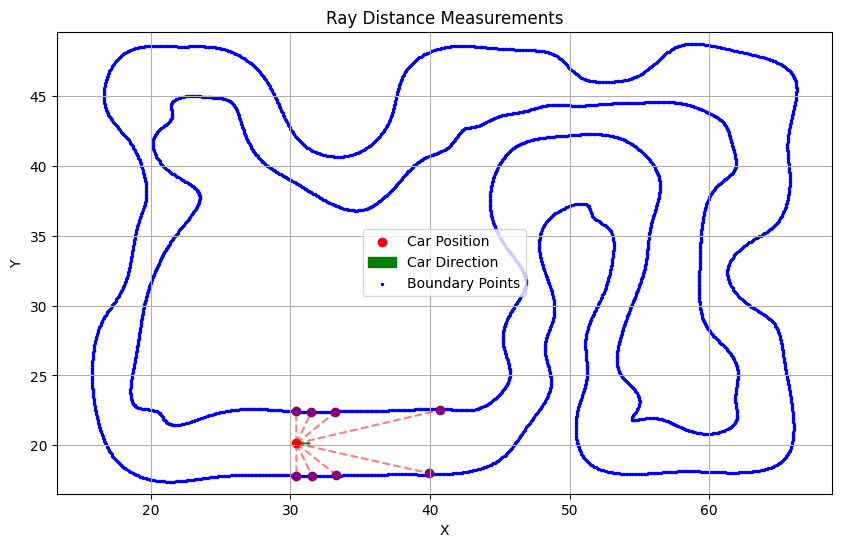

In [16]:
from env.gokart_environment import calculate_distances_to_boundary

distances, hit_points, _ = calculate_distances_to_boundary(
        car_pos, car_orientation, edge_points, num_rays, max_distance)
# print(projections.mean())
# print(perpendicular_distances.mean())
# distances_to_points = jnp.tile(distances_to_points, (1, num_rays))
# print(jnp.min(distances_to_points - projections))
# print(jnp.sqrt(jnp.min(distances_to_points ** 2 - projections ** 2)))
print(distances)
plt.figure(figsize=(10, 6))

# plot car position and orientation
plt.scatter(*car_pos, color='red', label='Car Position')
car_direction = jnp.array([jnp.cos(car_orientation[0]), jnp.sin(car_orientation[0])])
plt.arrow(car_pos[0], car_pos[1], car_direction[0], car_direction[1],
          color='green', head_width=0.1, length_includes_head=True, label='Car Direction')

# plot track boundary points
plt.scatter(edge_points[:, 0], edge_points[:, 1], color='blue', label='Boundary Points', s=2)

# plot hit points and rays
for i in range(num_rays):
    plt.plot([car_pos[0], hit_points[i, 0]], [car_pos[1], hit_points[i, 1]],
             'r--', alpha=0.5)
    plt.scatter(hit_points[i, 0], hit_points[i, 1], color='purple')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ray Distance Measurements')
plt.grid(True)
plt.axis('equal')
plt.show()